# Project: Classification for imbalanced datasets

### I. Introduction

In this project, I would like to investigate the performance of two classification machine learning algorithms of the "ensemble" family on imbalanced data: the gradient tree boosting and random forest classification algorithms. 


Imbalanced datasets are characterized by one class containing much more observations than the other class, which is quite frequently seen in real life. 


For this experiment, I will use two datasets, one (real) relating to credit card defaults and another synthetic dataset. I will use different metrics to compute in-sample and out-of-sample performance, in order to compare both algorithms.


### II. Machine Learning Algorithms

#### 1. Gradient Boosting Tree Classifier
Boosting methods are a widely-used in the machine learning world. The motivation behind it lies in a procedure that combines the outputs of many "weak" classifiers to produce a powerful "committee" decision. 

In particular, the gradient boosting tree (GBT) classifier uses decision trees as "weak" learners. Trees can be expressed as:

\begin{equation}
    T(x;\Theta) = \Sigma_{j=1}^{J} \gamma_j I(x \in R_j)
\end{equation}

with parameters $R_j$, the region j, $\gamma_j$ the predicted value for region j and $J$ itself, the number of nodes/leafs on the tree. The boosted tree model is a sum of such trees:

\begin{equation}
    f_M (x) = \Sigma_{m=1}^{M} T(x;\Theta_m)
\end{equation}

In gradient boosting trees, the first tree is fitted on the sample, but then each new tree is then fitted such as to minimize the loss function. The minimization problem can be written as:

\begin{equation}
    \hat{\Theta}_m = \arg\min{\Theta_m}\Sigma_{i=1}^{N} L \left(y_i, f_{m-1}(x_i) + T(x_i;\Theta_m) \right)
\end{equation}

One way to solve this minimization is the gradient descent algorithm. The tree is then fitted to the negative gradient by least squares:

\begin{equation}
    \tilde{\Theta}_m = \arg\min_{\Theta} \Sigma_{i=1}^{N} \left( -g_im - T(x_i;\Theta) \right)^2
\end{equation}

where $g_im$ is the gradient of the loss function at iteration m and for all observation $i=1,2,...,N$:

\begin{equation}
    g_{im} = \left[ \frac{\partial L(y_i, f(x_i))}{\partial f(x_i)} \right]_{f(x_i)=f_{m-1}(x_i)}
\end{equation}

Beside the size of each constituent tree $J$, we have also to choose the number of trees $M$ to be grown. Each new tree reduces the risk of misclassification but it also can lead to overfitting. 
Another parameter controlling the importance of a new tree is now introduced:

\begin{equation}
    f_{m}(x) = f_{m-1}(x) + \nu \Sigma_{i=1}^{N} \gamma_{jm} I(x \in R_{jm})
\end{equation}

$\nu$ will scale the contribution of each new tree by a factor $0<\nu<1$: smaller values of $\nu$ will lead to a larger training risk and control for overfitting. This parameter needs also to be calibrated to the (training) data.



##### Hyperparameters:
We are going to implement the GBT algorithm with scikit-learn. There are a certain number of hyperparameter to be chosen in this algorithm. Here below is a list of the relevant hyperparameters in particular for taking into account imbalances:

\- **learning_rate**: the learning rate $\nu$ shrinks the contribution of each tree. There is a trade-off between learning_rate and n_estimators.

\- **n_estimators**: the numbers of trees $M$ to be grown or iterations of the algorithm. 

\- **max_depth**: the maximum depth $J$ of a tree.

\- **subsample**: the fraction of observations to be selected for each tree. Selection is done by random sampling.

\- **min_samples_leaf**: this defines the minimum samples (or observations) required in a terminal node or leaf. As our dataset experiences imbalance in its response variable, we will set this parameter to a low value should be chosen for imbalanced class problems because the regions in which the minority class will be in majority will be very small.

#### 2. Random Forest
Random forest is another ensemble technique of the "bagging" kind. The weak learners in random forest are also decision trees. As we discussed, the trees have a high variance and small bias, but unlike boosting, the bagging idea is to reduce the variance of these estimators by averaging them:

\begin{equation}
    \hat{f}^{B}_{rf}(x) = \frac{1}{B} \Sigma_{b=1}^{B} T(x;\Theta_b)
\end{equation}

Where $B$ stands for the number of bootstrapped samples.

As the trees are identically distributed, the variance of the average is given by: $\rho \sigma^2 + \frac{1-\rho}{B} \sigma^2$ where $\rho$ is the pairwise correlation between each tree and $\sigma^2$ is the individual variance of a tree. We can see that this variance can be reduced if we have a large B and/or a small $\rho$.
The idea behind the random forest algorithm is to grow trees with reduced correlation. This is achieved in the tree-growing process through random selection of the input variables.

Random forest is uniquely a variance reduction technique. Indeed, the forest inherits the bias of the tree. Bagging multiple trees will not improve the bias, but the variance will be reduced. Furthermore, random forest has the advantage of having less complex hyperparameters to tune and being easier to implement then gradient boosting trees.

##### Hyperparameters:
The random forest algorithm is going to be implemented with scikit-learn. The main hyperparameters of random forest in scikit-learn are:

\- **n_estimators**: the number of trees grown in the random forest.

\- **max_features**: the number of features to consider when looking for the best split. The smaller the value of max_features, the lower the correlation between any pair of trees will be. If this value is too small, we might also face overfitting.

We will also include the following other parameters in the tuning procedure:

\- **min_samples_leaf**: the minimum number of samples required to be at a leaf node.

\- **min_samples_split**: the minimum number of samples required to split an internal node.

\- **max_depth**: the maximum depth of the tree.


#### 3. Comparing our estimators
In order to comare the quality of our estimators we are going to use a combination of accuracy indicators: 

\- **Precision** is a metric that quantifies the number of correct positive predictions made. Precision, therefore, calculates the accuracy for the minority class. In our case, this is an interesting metric if we want to avoid missclassifying default as non-default customers.

\- **Accuracy** is a metric that quantifies the number of correct positive predictions made out of all predictions that could have been made. In our study, we will want our accuracy score to be at least higher than the proportion of the majority class within the whole dataset. 

\- **F-score or f1-score** The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The F-score is calculated as follows: F1 = 2 * (precision * recall) / (precision + recall)

### III. Dataset creation and description
#### 1. Real dataset: credit card default in Taiwan

I have chosen a dataset on default for credit cards in Taïwan. The dataset is available on the UCI Machine Learning Repository. This is a good example of real life imbalance of the reponse variable in a dataset. Indeed banks will try to reduce their default rate on loan portfolio to 5% - 20% in order to make a profit. Therefore this can lead some algorithms to erros in their learning.
For instance, if we have only 10% of positive response on a population, and if our algorithm simply classifies all observation as negative reponse, we would then achieve a 90% accuracy ratio and we would not able to tell that our algorithm is failing.



In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# URL for the credit card default dataset (UCI Machine Learning Repository)
link = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
# download the file
df = pd.read_excel(io=link, header=1, index_col=0)
df = df.rename(columns={"default payment next month":"default"})
# Separate the response and the design matrix
Y = df["default"]
X = df.loc[:,:"PAY_AMT6"]

In [11]:
df.groupby(['default']).mean()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default,,,,,,,,,,,,,,,,,,,,,
0,178099.726074,1.614150,1.841337,1.558637,35.417266,-0.211222,-0.301917,-0.316256,-0.355633,-0.389488,...,47533.365605,43611.165254,40530.445343,39042.268704,6307.337357,6640.465074,5753.496833,5300.529319,5248.220296,5719.371769
1,130109.656420,1.567058,1.894665,1.528029,35.725738,0.668174,0.458258,0.362116,0.254521,0.167872,...,45181.598855,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068


We can see the imbalance in the response variable "default" in the figure below:

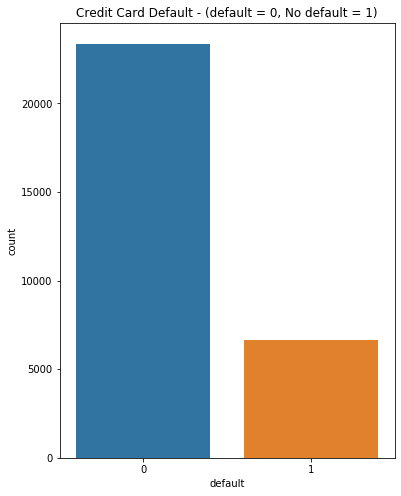

In [12]:
plt.figure(figsize = (6,8))
plt.title('Credit Card Default - (default = 0, No default = 1)')
sns.countplot(x="default", data=df)
locs, labels = plt.xticks()
plt.show()

Out of the 30,000 observations, we have 22.12% of them belonging to the "in-default" class (=1). 

Let us now see the proportion of default for a few feature variables. First we can see the default rate against the age of customers. Young (21-25) and elderly customers (70+) seem to have a higher proportion of defaults than the rest of the population.

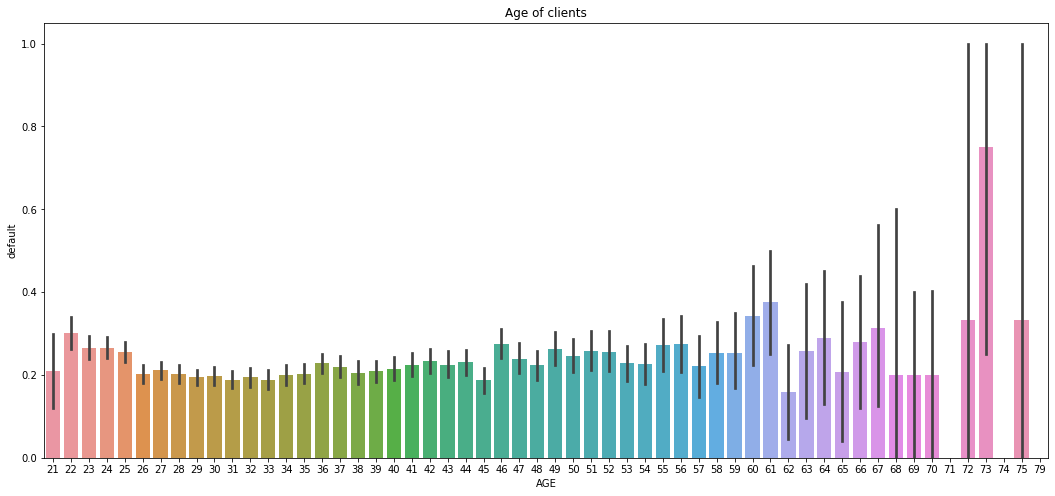

In [13]:
plt.figure(figsize = (18,8))
plt.title('Age of clients')
sns.barplot(x="AGE", y="default", data=df);
plt.show()

Education is also an important feature explaining default as seen in the figure below. There are however also some observations not labeled.

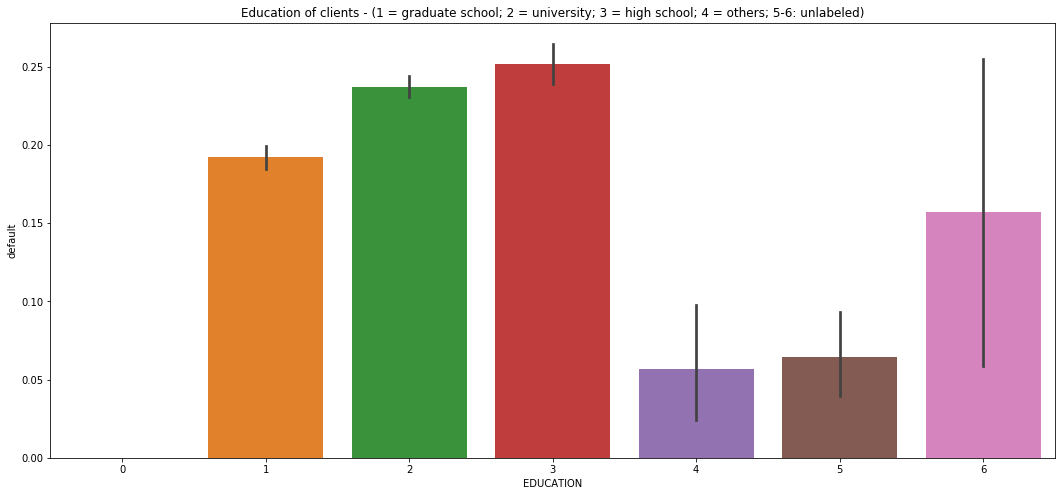

In [14]:
plt.figure(figsize = (18,8))
plt.title('Education of clients - (1 = graduate school; 2 = university; 3 = high school; 4 = others; 5-6: unlabeled)')
sns.barplot(x="EDUCATION", y="default", data=df);
plt.show()

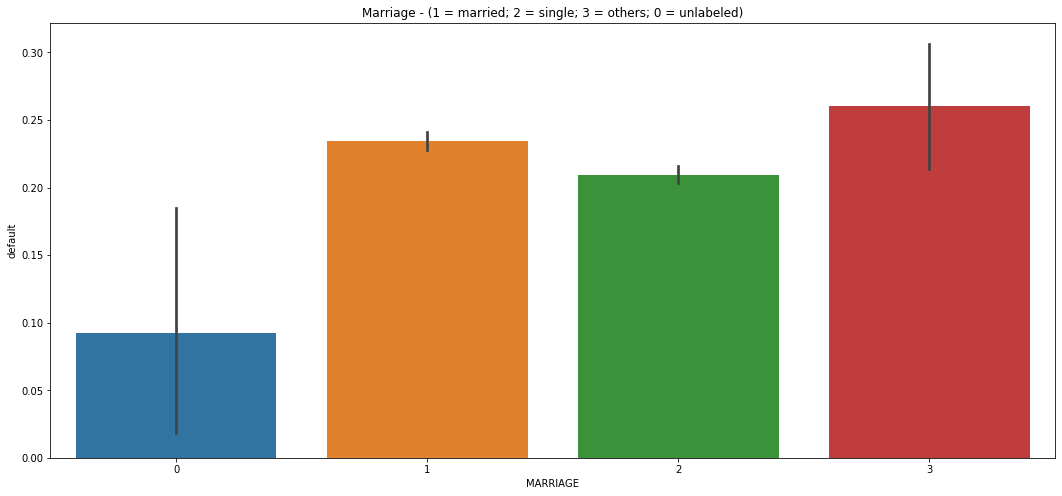

In [15]:
plt.figure(figsize = (18,8))
plt.title('Marriage - (1 = married; 2 = single; 3 = others; 0 = unlabeled)')
sns.barplot(x="MARRIAGE", y="default", data=df);
plt.show()

The limit of withdrawal of the credit card contract could be an important predictive feature:

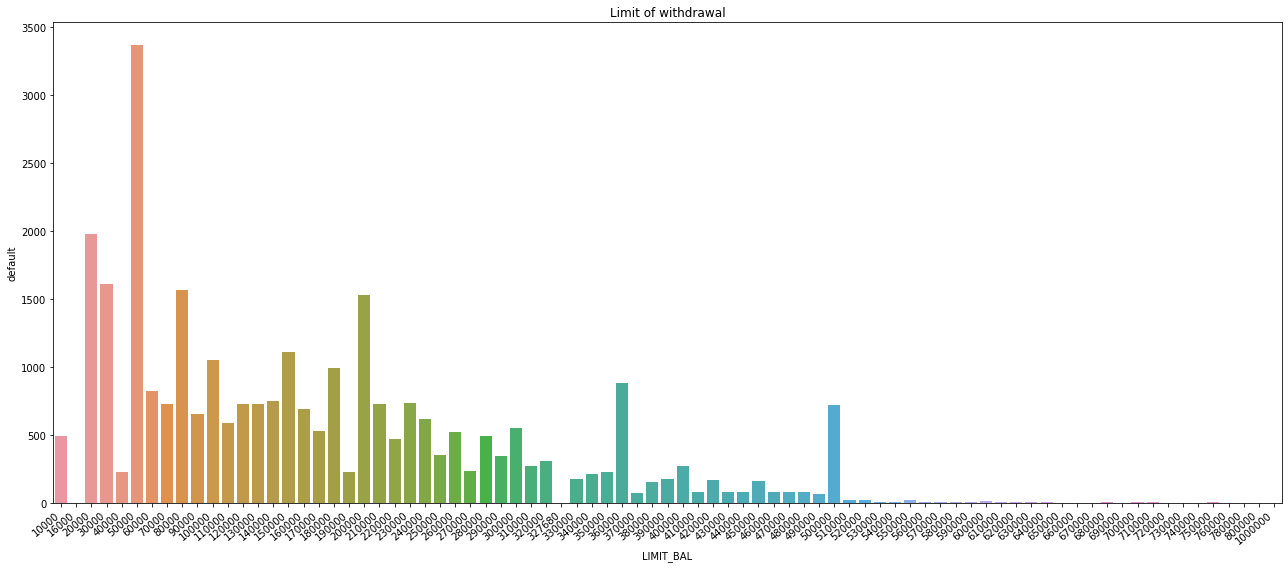

In [16]:
plt.figure(figsize = (18,8))
plt.title('Limit of withdrawal')
ax = sns.countplot(x="LIMIT_BAL", data=df)
sns.barplot(x="LIMIT_BAL", y="default", palette="pastel", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

We can see that female customers have also lower default rate than male customers:

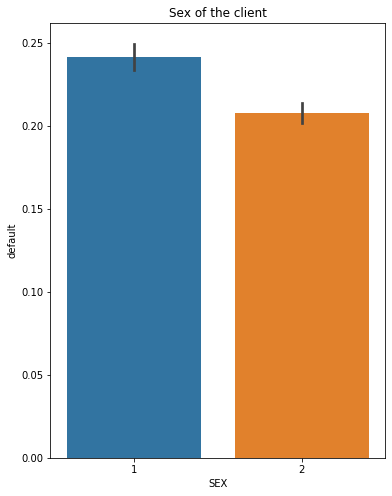

In [17]:
plt.figure(figsize = (6,8))
plt.title('Sex of the client')
sns.barplot(x="SEX", y="default", data=df);
plt.show()

The random forest and gradient boosting tree classifier are implemented in scikit-learn. We are going to run first these models without hyperparameter tuning nor taking into account imbalanceness of our data:

In [18]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

We are going to split our dataset between training and test datasets. The training set will be used to fit our model. The test set will be used only at the end of the procedure, and it will evalute the acurateness of our fitted model.

#### 2. Synthetic dataset

For the synthetic dataset, I am using a variation of the dataset created in Hastie (example 10.2):

\begin{equation}
  Y =
    \begin{cases}
      1 \text{ if } \Sigma_{j=1}^{10} X_{j}^{2}> \chi_{10}^{2}(0.2) \\
      -1 \text{ otherwise } \\
    \end{cases}       
\end{equation}

Where $\chi_{10}^{2}(0.2)$ is the 20th percentile of the chi-square distribution with df = 10. This will result in only 20% observation of positive (=1) responses in our dataset. 

In [19]:
# synthetic dataset for classification:
def make_synthetic_dataset(n=10, random_state=20):
    """
    This function creates a synthetic dataset similar to the example in Hastie (10.2).
    It is slightly modified to have imbalance in the reponse variable.
    :param n: number of samples
    :param random_state: fix random generator seed
    :return:
    """
    X = []
    Y = np.zeros(n)
    for i in range(n):
        X.append(np.random.standard_normal(10))
        Y[i] = 1 if sum(np.power(X[i], 2)) > chi2.ppf(q=0.2, df=10) else -1
    return [X, Y]

###  IV. Training the models

#### 1. Credit card default dataset

In [20]:
# Load machine learning libraries
import numpy as np
from pprint import pprint
from scipy.stats import chi2
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, make_scorer, f1_score

The random forest and gradient boosting tree classifier are implemented in scikit-learn. We are going to run first these models without hyperparameter tuning nor taking into account imbalanceness of our data:

In [21]:
### Baseline model:
# Gradient Boosting Classifier
gtb0 = GradientBoostingClassifier()
gtb0.fit(X_train, y_train)
inS_gtb0_pred = gtb0.predict(X_train)
outS_gtb0_pred = gtb0.predict(X_test)
# Random Forest Classifier
rf0 = RandomForestClassifier(class_weight='balanced')
rf0.fit(X_train, y_train)
inS_rf0_pred = rf0.predict(X_train)
outS_rf0_pred = rf0.predict(X_test)

In [22]:
# Compare both estimators (in terms of precision, accuracy, )
dcc_base_prec_df = pd.DataFrame({
    "GBT": {"InSample": np.round(precision_score(y_train, inS_gtb0_pred), 2),
              "OutSample": np.round(precision_score(y_test, outS_gtb0_pred), 2),},
    "RF":{"InSample": np.round(precision_score(y_train,inS_rf0_pred),2),
             "OutSample": np.round(precision_score(y_test,outS_rf0_pred),2)},
})

dcc_base_acc_df = pd.DataFrame({
    "GBT": {"InSample": np.round(accuracy_score(y_train, inS_gtb0_pred), 2),
              "OutSample": np.round(accuracy_score(y_test, outS_gtb0_pred), 2),},
    "RF":{"InSample": np.round(accuracy_score(y_train,inS_rf0_pred),2),
             "OutSample": np.round(accuracy_score(y_test,outS_rf0_pred),2)},
})

dcc_base_f1s_df = pd.DataFrame({
    "GBT": {"InSample": np.round(f1_score(y_train, inS_gtb0_pred), 2),
              "OutSample": np.round(f1_score(y_test, outS_gtb0_pred), 2),},
    "RF":{"InSample": np.round(f1_score(y_train,inS_rf0_pred),2),
             "OutSample": np.round(f1_score(y_test,outS_rf0_pred),2)},
})

In [23]:
print("Precision")
print("------------------------")
print(dcc_base_prec_df)
print("")
print("Accuracy")
print("------------------------")
print(dcc_base_acc_df)
print("")
print("F1-score")
print("------------------------")
print(dcc_base_f1s_df)
print("------------------------")

Precision
------------------------
            GBT    RF
InSample   0.70  1.00
OutSample  0.68  0.66

Accuracy
------------------------
            GBT    RF
InSample   0.83  1.00
OutSample  0.82  0.82

F1-score
------------------------
            GBT    RF
InSample   0.48  1.00
OutSample  0.49  0.47
------------------------


Overall it seems that GBT is doing better than RF. Wince we have about 20% imbalance in our dataset, an accuracy of 80% is not sufficient. The random forest algorithm seems to be subject to some overfitting as precision and accuracy both drops from 1 to 0.67 and 0.82 respectively. On the other hand, the difference between in-sample and out-of-sample precision/accuracy for GBT is very small.

Here are the default parameters used for both algorithms:

In [24]:
pprint(gtb0.get_params())

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [25]:
pprint(gtb0.get_params())

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


#### Hyperparameter tuning:
Let us now try to improve these results by tuning the hyperparameters. There are actually number of hyperparameter to be tuned for the gradient tree boosting and random forest as we can see here above. On one hand we have the underlying tree parameters and on the other boosting/bagging parameters.
In order to do this, we are going to provide to our classifiers a grid for each hyperparameters and use the $RandomizedSearchCV$ function from scikit-learn, which uses cross-validation on our traning set to tune the hyperparameters.

Unfortunately the RandomizedSearchCV can take some time to evaluate all the combinations of parameters. Due to this long processing time, I am including in the code below the optimal parameter values that I obtained after several trials:

In [26]:
# Fine-Tuning of the Gradient Boosting Classifier hyperparameters:
gtb_params = {
    "learning_rate": [0.01, 0.05, 0.1],
    "n_estimators": [50, 100, 200, 500, 1000],
    'max_depth': [5, 10, 15],
    'max_features': ["log2","sqrt"],
    'min_samples_split': [500, 1000, 1500],
    'min_samples_leaf': [50, 100, 150],
    "subsample":[0.6, 0.7, 0.8, 0.9, 1],
    }
gtb_params= {
    'subsample': [1],
    'n_estimators': [100],
    'min_samples_split': [500],
    'min_samples_leaf': [50],
    'max_features': ["sqrt"],
    'max_depth': [10],
    'learning_rate': [0.05]
}
grid_gtb = RandomizedSearchCV(GradientBoostingClassifier(), gtb_params, n_iter=100, cv=5, random_state=42, n_jobs=-1).fit(X_train, y_train)

E:\Program Files (x86)\Anaconda\envs\py37_full\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [27]:
# Fine-Tuning of the Random Forest Classifier hyperparameters:
rf_params = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3, 5],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
rf_params = {
    'n_estimators': [300],
    'min_samples_split': [12],
    'min_samples_leaf': [5],
    'max_features': [3],
    'max_depth': [80]
}

grid_rf= RandomizedSearchCV(RandomForestClassifier(), rf_params, n_iter=100, cv=5, random_state=42, n_jobs=-1).fit(X_train, y_train)

E:\Program Files (x86)\Anaconda\envs\py37_full\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


We can re-run our models with optimized hyperparameters and compute their accuracy and precision:

In [28]:
# optimized Gradient Boosting Classifier
gtb_opt = GradientBoostingClassifier(**grid_gtb.best_params_).fit(X_train, y_train)
inS_gtb_opt_pred = gtb_opt.predict(X_train)
outS_gtb_opt_pred = gtb_opt.predict(X_test)

# optimized Random Forest Classifier
rf_opt = RandomForestClassifier(**grid_rf.best_params_, class_weight='balanced').fit(X_train, y_train)
inS_rf_opt_pred = rf_opt.predict(X_train)
outS_rf_opt_pred = rf_opt.predict(X_test)

In [29]:
# Let us now compare both estimators in terms of precision, accuracy and f1-score:
dcc_opt_prec_df = pd.DataFrame({
    "GBT": {"InSample": np.round(precision_score(y_train, inS_gtb_opt_pred), 2),
              "OutSample": np.round(precision_score(y_test, outS_gtb_opt_pred), 2),},
    "RF":{"InSample": np.round(precision_score(y_train,inS_rf_opt_pred),2),
             "OutSample": np.round(precision_score(y_test,outS_rf_opt_pred),2)},
})

dcc_opt_acc_df = pd.DataFrame({
    "GBT": {"InSample": np.round(accuracy_score(y_train, inS_gtb_opt_pred), 2),
              "OutSample": np.round(accuracy_score(y_test, outS_gtb_opt_pred), 2),},
    "RF":{"InSample": np.round(accuracy_score(y_train,inS_rf_opt_pred),2),
             "OutSample": np.round(accuracy_score(y_test,outS_rf_opt_pred),2)},
})

dcc_opt_f1s_df = pd.DataFrame({
    "GBT": {"InSample": np.round(f1_score(y_train, inS_gtb_opt_pred), 2),
              "OutSample": np.round(f1_score(y_test, outS_gtb_opt_pred), 2),},
    "RF":{"InSample": np.round(f1_score(y_train,inS_rf_opt_pred),2),
             "OutSample": np.round(f1_score(y_test,outS_rf_opt_pred),2)},
})

In [30]:
print("Precision")
print("------------------------")
print(dcc_opt_prec_df)
print("")
print("Accuracy")
print("------------------------")
print(dcc_opt_acc_df)
print("")
print("F1-score")
print("------------------------")
print(dcc_opt_f1s_df)
print("------------------------")

Precision
------------------------
            GBT    RF
InSample   0.72  0.74
OutSample  0.68  0.56

Accuracy
------------------------
            GBT    RF
InSample   0.83  0.90
OutSample  0.82  0.81

F1-score
------------------------
            GBT    RF
InSample   0.51  0.80
OutSample  0.50  0.56
------------------------


We can see that the hyperparameter tuning hasn't been a success overall. In terms of precision, the GBT has slightly improved in out-of-sample data, but the RF has worsened from 0.66 to 0.55. The same applies in accuracy. For F1-score, we notice that RF has improved from 0.46 to 0.55.
Overall I think that the tuning procedure might be improven with better initial guesses and a less wide range of parameter choice. Nevertheless the GBT seems to win the match both in-sample and out-of-sample precision against RF.

#### 2. Synthetic dataset
Now we turn to the synthetic dataset. We will generate a design matrix (X) of size 10000x10.

In [31]:
# Create the synthetic dataset
synth_data = make_synthetic_dataset(10000)
# Split data into response and design matrix
X = synth_data[0]
Y = synth_data[1]

In [32]:
# Split into training and test sets
X_synth_train, X_synth_test, y_synth_train, y_synth_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [33]:
# Apply baseline models (no hyperparameter tuning):
# Gradient Boosting Classifier:
gtb0_synth = GradientBoostingClassifier()
gtb0_synth.fit(X_synth_train, y_synth_train)
inS_gtb0_synth_pred = gtb0_synth.predict(X_synth_train)
outS_gtb0_synth_pred = gtb0_synth.predict(X_synth_test)

# Random Forest Classifier:
rf0_synth = RandomForestClassifier(class_weight='balanced')
rf0_synth.fit(X_synth_train, y_synth_train)
inS_rf0_synth_pred = rf0_synth.predict(X_synth_train)
outS_rf0_synth_pred = rf0_synth.predict(X_synth_test)

In [34]:
# Now we compare each estimators in terms of precision, acuracy and f1-score:
synth_prec_df = pd.DataFrame({
    "GBT": {"InSample": np.round(precision_score(y_synth_train, inS_gtb0_synth_pred), 2),
              "OutSample": np.round(precision_score(y_synth_test, outS_gtb0_synth_pred), 2),},
    "RF":{"InSample": np.round(precision_score(y_synth_train,inS_rf0_synth_pred),2),
             "OutSample": np.round(precision_score(y_synth_test,outS_rf0_synth_pred),2)},
})

synth_acc_df = pd.DataFrame({
        "GBT": {"InSample": np.round(accuracy_score(y_synth_train, inS_gtb0_synth_pred), 2),
              "OutSample": np.round(accuracy_score(y_synth_test, outS_gtb0_synth_pred), 2),},
    "RF":{"InSample": np.round(accuracy_score(y_synth_train,inS_rf0_synth_pred),2),
             "OutSample": np.round(accuracy_score(y_synth_test,outS_rf0_synth_pred),2)},
})

synth_f1s_df = pd.DataFrame({
    "GBT": {"InSample": np.round(f1_score(y_synth_train, inS_gtb0_synth_pred), 2),
              "OutSample": np.round(f1_score(y_synth_test, outS_gtb0_synth_pred), 2),},
    "RF":{"InSample": np.round(f1_score(y_synth_train,inS_rf0_synth_pred),2),
             "OutSample": np.round(f1_score(y_synth_test,outS_rf0_synth_pred),2)},
})


In [35]:
print("Precision")
print("------------------------")
print(synth_prec_df)
print("")
print("Accuracy")
print("------------------------")
print(synth_acc_df)
print("")
print("F1-score")
print("------------------------")
print(synth_f1s_df)
print("------------------------")

Precision
------------------------
            GBT    RF
InSample   0.91  1.00
OutSample  0.90  0.93

Accuracy
------------------------
            GBT    RF
InSample   0.92  1.00
OutSample  0.91  0.93

F1-score
------------------------
            GBT    RF
InSample   0.95  1.00
OutSample  0.95  0.96
------------------------


We achieve a very good result in terms of precision, accuracy and  f1-score, with the default hyperparameter values. 
Let us now try to improve this with tuned hyperparameters.

#### Hyperparameter tuning:

In [36]:
# Fine-Tuning of the Gradient Boosting Classifier hyperparameters:
synth_gtb_params = {
    "learning_rate": [0.01, 0.05, 0.1],
    "n_estimators": [50, 100, 200, 500, 1000],
    'max_depth': [5, 10, 15],
    'max_features': ["log2","sqrt"],
    'min_samples_split': [500, 1000, 1500],
    'min_samples_leaf': [50, 100, 150],
    "subsample":[0.6, 0.7, 0.8, 0.9, 1],
    }
synth_gtb_params = {
    'subsample': [0.9],
     'n_estimators': [1000],
     'min_samples_split': [1000],
     'min_samples_leaf': [50],
     'max_features': ['log2'],
     'max_depth': [5],
     'learning_rate': [0.05]
}
grid_gtb_synth = RandomizedSearchCV(GradientBoostingClassifier(), synth_gtb_params, n_iter=100, cv=5, random_state=42, n_jobs=-1).fit(X_synth_train, y_synth_train)

E:\Program Files (x86)\Anaconda\envs\py37_full\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [37]:
# Fine-Tuning of the Gradient Boosting Classifier hyperparameters:
synth_rf_params = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3, 5],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
synth_rf_params = {
    'n_estimators': [100],
     'min_samples_split': [8],
     'min_samples_leaf': [3],
     'max_features': [5],
     'max_depth': [80]
}
grid_rf_synth = RandomizedSearchCV(RandomForestClassifier(), synth_rf_params, n_iter=100, cv=5, random_state=42, n_jobs=-1).fit(X_synth_train, y_synth_train)

E:\Program Files (x86)\Anaconda\envs\py37_full\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [ ]:
# Apply Gradient tree boosting classifier with fine-tuned hyperparameters:
gtb_opt_synth = GradientBoostingClassifier(**grid_gtb_synth.best_params_).fit(X_synth_train, y_synth_train)
inS_gtb_synth_pred = gtb_opt_synth.predict(X_synth_train)
outS_gtb_synth_pred = gtb_opt_synth.predict(X_synth_test)
# Apply Random Forest classifier with fine-tuned hyperparameters:
rf_opt_synth = RandomForestClassifier(**grid_rf_synth.best_params_, class_weight='balanced').fit(X_synth_train, y_synth_train)
inS_rf_synth_pred = rf_opt_synth.predict(X_synth_train)
outS_rf_synth_pred = rf_opt_synth.predict(X_synth_test)

In [ ]:
# Compare each estimators in terms of precision, acuracy and f1-score:
synth_opt_prec_df = pd.DataFrame({
    "GBT": {"InSample": np.round(precision_score(y_synth_train, inS_gtb_synth_pred), 2),
              "OutSample": np.round(precision_score(y_synth_test, outS_gtb_synth_pred), 2),},
    "RF":{"InSample": np.round(precision_score(y_synth_train,inS_rf_synth_pred),2),
             "OutSample": np.round(precision_score(y_synth_test,outS_rf_synth_pred),2)},
})

synth_opt_acc_df = pd.DataFrame({
        "GBT": {"InSample": np.round(accuracy_score(y_synth_train, inS_gtb_synth_pred), 2),
              "OutSample": np.round(accuracy_score(y_synth_test, outS_gtb_synth_pred), 2),},
    "RF":{"InSample": np.round(accuracy_score(y_synth_train,inS_rf_synth_pred),2),
             "OutSample": np.round(accuracy_score(y_synth_test,outS_rf_synth_pred),2)},
})

synth_opt_f1s_df = pd.DataFrame({
    "GBT": {"InSample": np.round(f1_score(y_synth_train, inS_gtb_synth_pred), 2),
              "OutSample": np.round(f1_score(y_synth_test, outS_gtb_synth_pred), 2),},
    "RF":{"InSample": np.round(f1_score(y_synth_train,inS_rf_synth_pred),2),
             "OutSample": np.round(f1_score(y_synth_test,outS_rf_synth_pred),2)},
})

In [ ]:
print("Precision")
print("------------------------")
print(synth_opt_prec_df)
print("")
print("Accuracy")
print("------------------------")
print(synth_opt_acc_df)
print("")
print("F1-score")
print("------------------------")
print(synth_opt_f1s_df)
print("------------------------")

The result has been improved due to the tuned hyperparameters. Overall both algorithms deliver very good accuracy and precision on this dataset.

###  V. Conclusion

In this project, I have been investigating the performance of two well-known machine learning algorithms, the Gradient Boosting Tree Classifier and the Random Forest Classifier. These algorithms both use tree as "weak" learners but their underlying method is different (bagging Vs boosting).

The gradient boosting algorithm has been more robust in terms of out-of-sample error on the real data set. However, both algorithms have not achieved an exceptional performance in terms of precision and, even after the hyperparameter tuning procedure. Both algorithms have performed very well on the synthetic dataset.

Overall, I think both of these algorithms are suitable for classification problems with imbalance in the response variable. Better performance could have been achieved with a wider grid for hyperparameter tuning, and probably also with data cleaning/feature selection.